In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [2]:
df = pd.read_csv(r'/home/hripsime/Desktop/clients/countries of the world.csv')

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [15]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [6]:
df.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [7]:
to_numeric = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)','Net migration', 'Infant mortality (per 1000 births)','Literacy (%)', 'Phones (per 1000)', 'Arable (%)','Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

In [8]:
df['Pop. Density (per sq. mi.)'].values  #10,8 -> 10.8

array(['48,0', '124,6', '13,8', '290,4', '152,1', '9,7', '132,1', '156,0',
       '14,4', '99,9', '372,5', '2,6', '97,7', '91,9', '21,8', '1050,5',
       '1023,4', '649,5', '49,6', '340,0', '12,5', '69,8', '1241,0',
       '48,5', '8,2', '88,0', '2,7', '22,1', '151,0', '65,8', '66,6',
       '50,7', '69,8', '290,7', '76,7', '36,5', '3,3', '104,4', '173,4',
       '6,9', '7,7', '21,3', '136,9', '38,3', '318,4', '26,7', '10,8',
       '89,1', '79,8', '54,8', '79,5', '102,7', '84,8', '129,8', '126,5',
       '21,2', '91,4', '188,5', '70,8', '47,8', '78,8', '324,3', '19,3',
       '39,5', '29,3', '66,3', '33,8', '49,6', '15,5', '111,3', '2,2',
       '65,9', '5,3', '145,3', '3968,8', '66,9', '230,9', '93,6',
       '3989,7', '81,0', '0,0', '260,8', '254,4', '316,1', '112,9',
       '838,6', '39,4', '39,9', '3,6', '299,4', '65,4', '6355,7', '107,3',
       '2,9', '333,2', '127,9', '41,7', '61,3', '57,8', '131,9', '305,8',
       '193,0', '250,9', '337,4', '785,2', '64,0', '5,6', '59,6', '1

In [9]:
df[to_numeric] = df[to_numeric].apply(lambda x: x.str.replace(',','.'))

#df[['col1', 'col2', ...]] = .apply(lambda x: x.str.replace())

In [10]:
df['Pop. Density (per sq. mi.)'].values

array(['48.0', '124.6', '13.8', '290.4', '152.1', '9.7', '132.1', '156.0',
       '14.4', '99.9', '372.5', '2.6', '97.7', '91.9', '21.8', '1050.5',
       '1023.4', '649.5', '49.6', '340.0', '12.5', '69.8', '1241.0',
       '48.5', '8.2', '88.0', '2.7', '22.1', '151.0', '65.8', '66.6',
       '50.7', '69.8', '290.7', '76.7', '36.5', '3.3', '104.4', '173.4',
       '6.9', '7.7', '21.3', '136.9', '38.3', '318.4', '26.7', '10.8',
       '89.1', '79.8', '54.8', '79.5', '102.7', '84.8', '129.8', '126.5',
       '21.2', '91.4', '188.5', '70.8', '47.8', '78.8', '324.3', '19.3',
       '39.5', '29.3', '66.3', '33.8', '49.6', '15.5', '111.3', '2.2',
       '65.9', '5.3', '145.3', '3968.8', '66.9', '230.9', '93.6',
       '3989.7', '81.0', '0.0', '260.8', '254.4', '316.1', '112.9',
       '838.6', '39.4', '39.9', '3.6', '299.4', '65.4', '6355.7', '107.3',
       '2.9', '333.2', '127.9', '41.7', '61.3', '57.8', '131.9', '305.8',
       '193.0', '250.9', '337.4', '785.2', '64.0', '5.6', '59.6', '1

In [11]:
for col in to_numeric:
    df[col] = pd.to_numeric(df[col], errors="ignore")

In [12]:
df.info()   #.factorize() | get_dummies()  10 (df[col].unique / df[col].nunique)  10 columns 00000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [13]:
df.describe() 

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [14]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [15]:
df['Climate'].values

array([1. , 3. , 1. , 2. , 3. , nan, 2. , 2. , 3. , 4. , 2. , 1. , 3. ,
       1. , 2. , 1. , 2. , 2. , 4. , 3. , 2. , 2. , 2. , 2. , 1.5, 4. ,
       1. , 2. , 2. , 2. , 3. , 2. , 2. , 2. , 2. , 1.5, nan, 3. , 2. ,
       2. , 2. , 3. , 1.5, 2. , 2. , 2. , 2. , 2. , 2. , 2. , nan, 2. ,
       3. , 3. , 3. , 1. , 2. , 2. , 2. , 2. , 1. , 2. , 2. , 1.5, 3. ,
       2. , nan, 2. , 3. , 4. , 2. , 2. , 2. , 2. , 3. , 3. , 3. , 2. ,
       nan, 3. , 1. , 2. , 2. , 2. , 2. , 3. , 2. , 2. , 2. , 2. , 2. ,
       2. , 3. , 3. , 2.5, 2. , 1. , 1. , 3. , 3. , 3. , nan, 2. , 3. ,
       3. , 1. , 4. , 1.5, 2. , 3. , 3. , 1. , 2.5, 2. , 3. , nan, 3. ,
       2. , nan, 4. , nan, nan, 2. , 3. , 2. , 2. , 2. , 2. , 2. , nan,
       2. , 2. , 1. , 2. , 2. , 1.5, 2. , nan, nan, 1. , 2. , nan, 2. ,
       1. , 2. , nan, 3. , 2. , 2. , 3. , 2. , 1. , 1.5, 2. , 3. , 1. ,
       1. , 2. , 2. , 2. , 2. , 1.5, 2. , 3. , 3. , 2. , 1. , 2. , 3. ,
       nan, 3. , nan, 2. , 2. , nan, 2. , 2. , nan, 2. , 1. , 2.

In [16]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

/tmp/ipykernel_72708/2345154803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]
/tmp/ipykernel_72708/2345154803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]
/tmp/ipykernel_72708/2345154803.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[(df[col].isnull())&

In [17]:
df['Climate'].values

array([1. , 3. , 1. , 2. , 3. , 2. , 2. , 2. , 3. , 4. , 2. , 1. , 3. ,
       1. , 2. , 1. , 2. , 2. , 4. , 3. , 2. , 2. , 2. , 2. , 1.5, 4. ,
       1. , 2. , 2. , 2. , 3. , 2. , 2. , 2. , 2. , 1.5, 3. , 3. , 2. ,
       2. , 2. , 3. , 1.5, 2. , 2. , 2. , 2. , 2. , 2. , 2. , 3. , 2. ,
       3. , 3. , 3. , 1. , 2. , 2. , 2. , 2. , 1. , 2. , 2. , 1.5, 3. ,
       2. , 3. , 2. , 3. , 4. , 2. , 2. , 2. , 2. , 3. , 3. , 3. , 2. ,
       3. , 3. , 1. , 2. , 2. , 2. , 2. , 3. , 2. , 2. , 2. , 2. , 2. ,
       2. , 3. , 3. , 2.5, 2. , 1. , 1. , 3. , 3. , 3. , 3. , 2. , 3. ,
       3. , 1. , 4. , 1.5, 2. , 3. , 3. , 1. , 2.5, 2. , 3. , 1. , 3. ,
       2. , 1. , 4. , 3. , 3. , 2. , 3. , 2. , 2. , 2. , 2. , 2. , 3. ,
       2. , 2. , 1. , 2. , 2. , 1.5, 2. , 4. , 3. , 1. , 2. , 1. , 2. ,
       1. , 2. , 2. , 3. , 2. , 2. , 3. , 2. , 1. , 1.5, 2. , 3. , 1. ,
       1. , 2. , 2. , 2. , 2. , 1.5, 2. , 3. , 3. , 2. , 1. , 2. , 3. ,
       4. , 3. , 2. , 2. , 2. , 3. , 2. , 2. , 3. , 2. , 1. , 2.

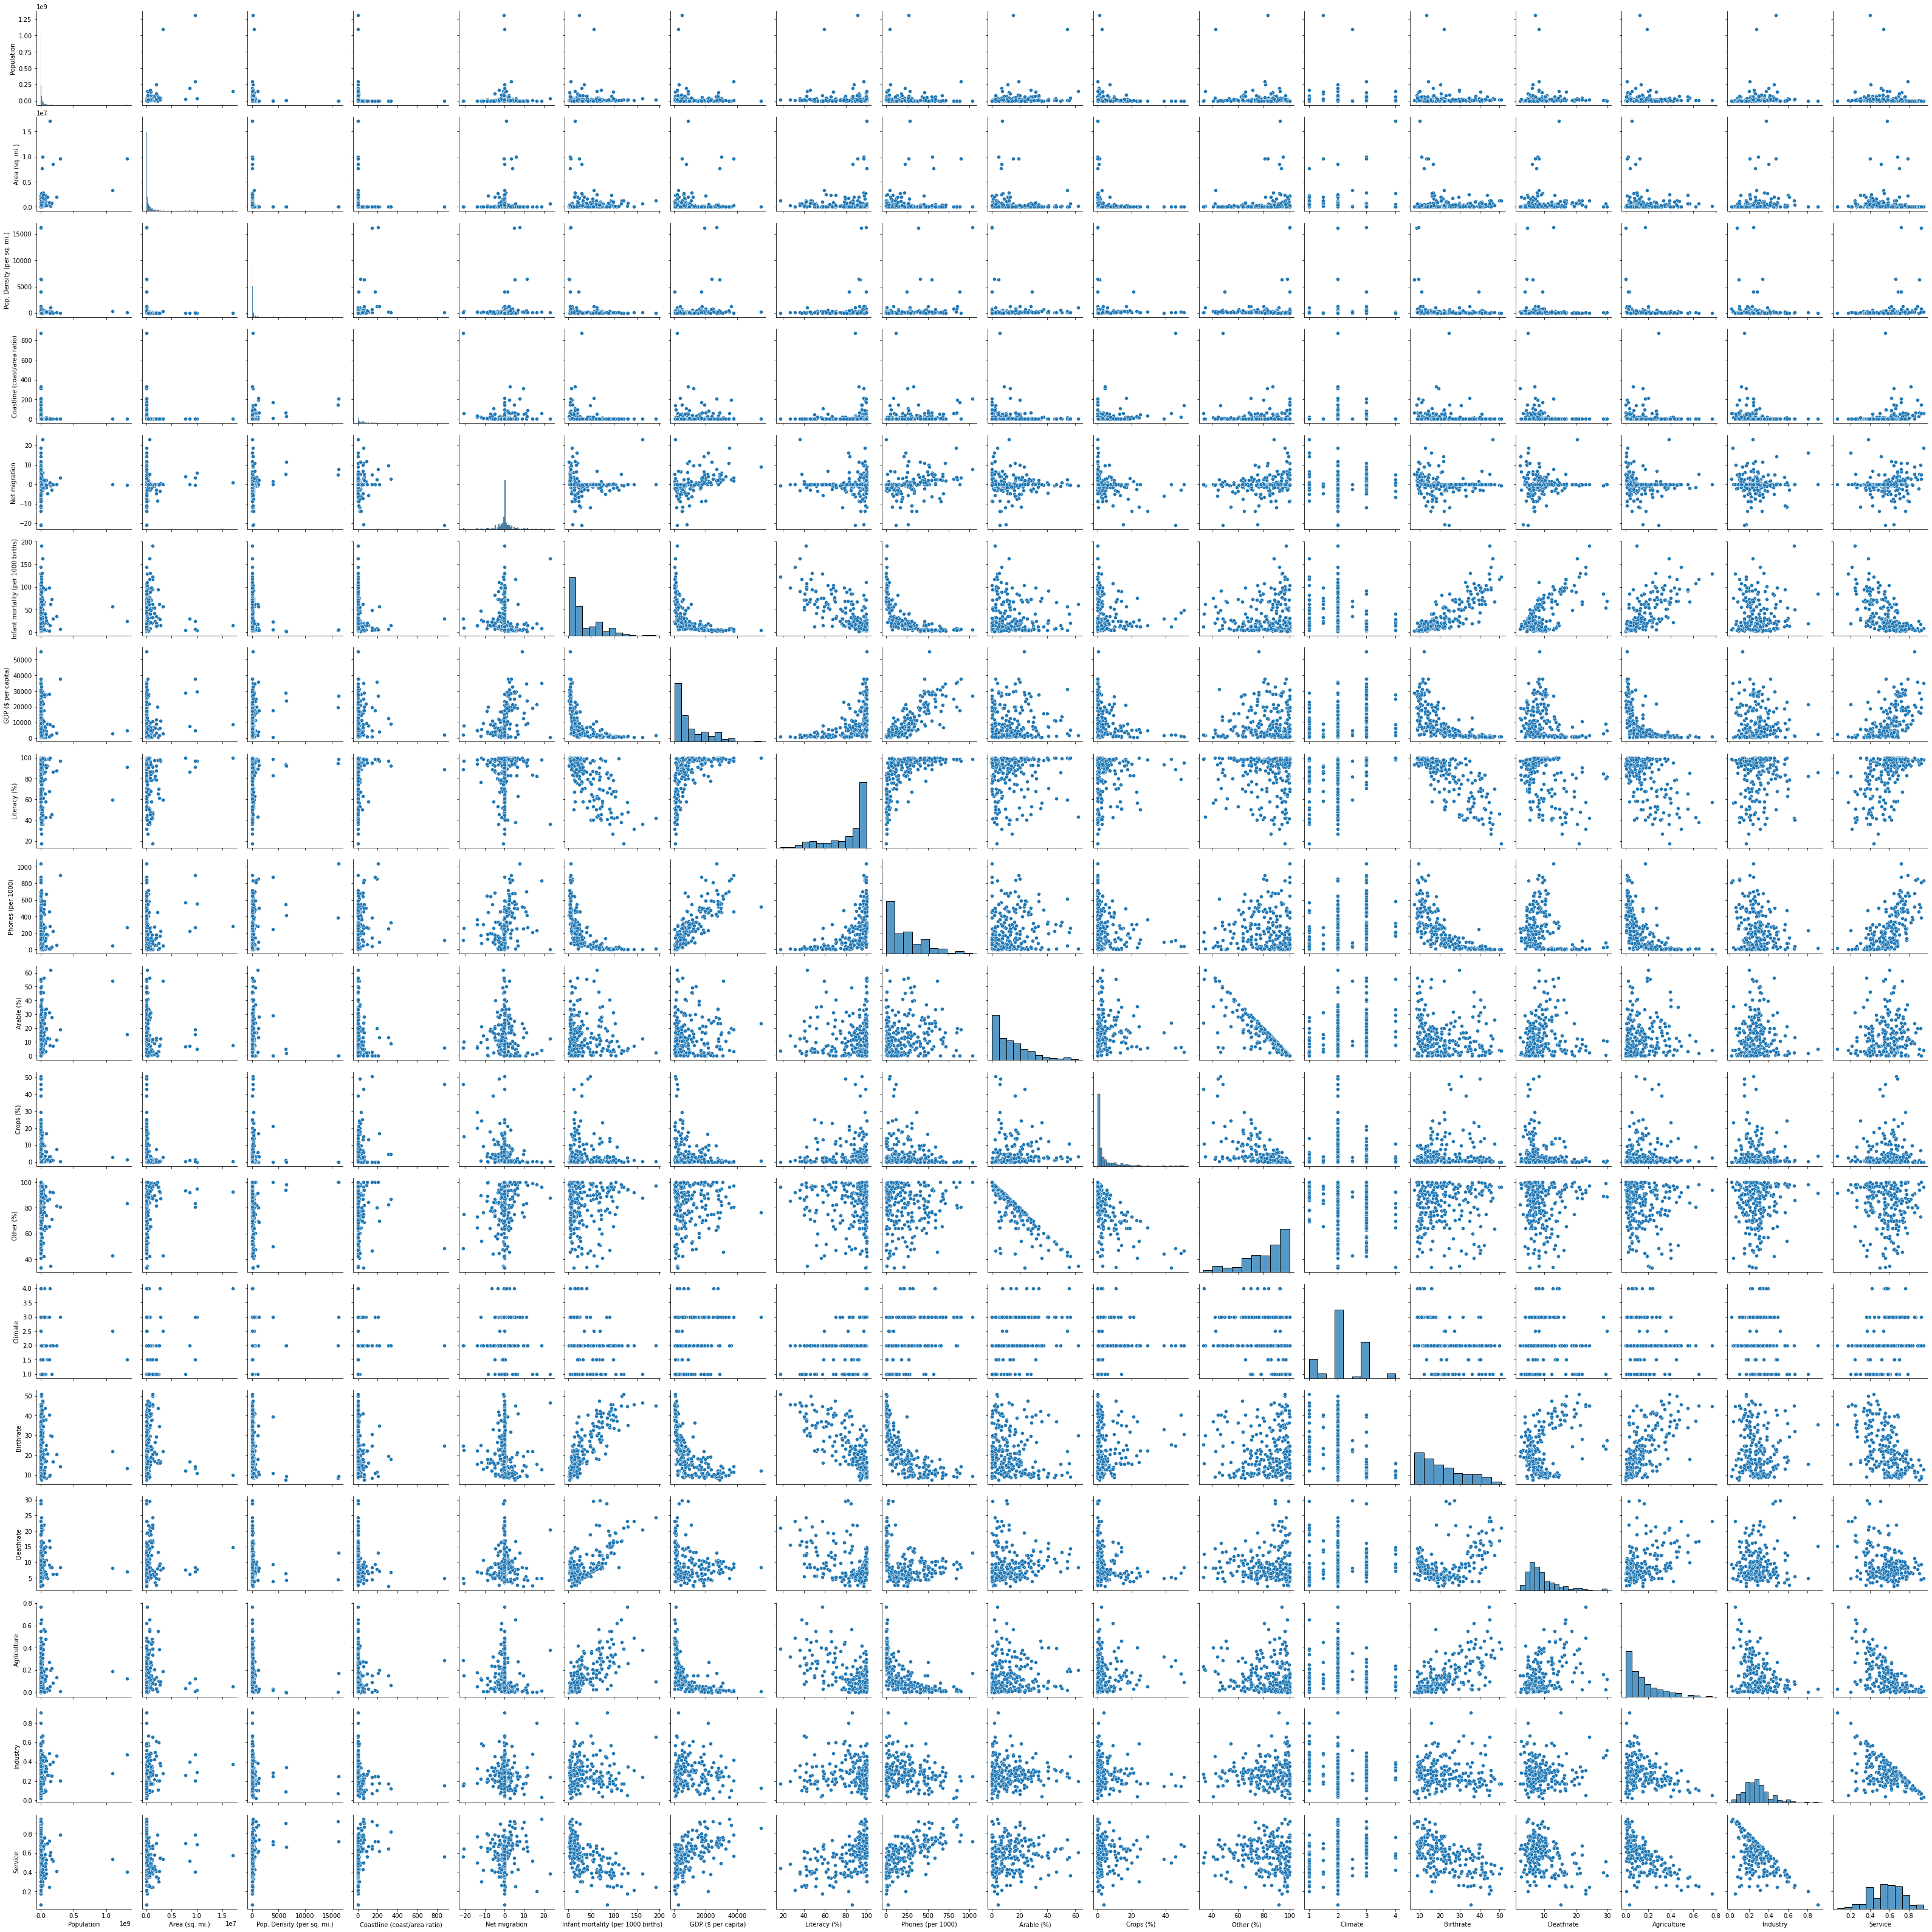

In [20]:
plt.figure(figsize=(16,12))
sns.pairplot(df)
plt.show()

In [ ]:
df['Region'] = pd.factorize(df['Region'])[0]

In [ ]:
df = pd.get_dummies(df['Country'], drop_first=True, )

In [21]:
# df_new = df.drop(['Country','Region'], axis=1) 

In [22]:
for i in df_new.columns:
    np.log(df_new[i]) 

/home/hripsime/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/hripsime/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Population                          227 non-null    int64  
 1   Area (sq. mi.)                      227 non-null    int64  
 2   Pop. Density (per sq. mi.)          227 non-null    float64
 3   Coastline (coast/area ratio)        227 non-null    float64
 4   Net migration                       227 non-null    float64
 5   Infant mortality (per 1000 births)  227 non-null    float64
 6   GDP ($ per capita)                  227 non-null    float64
 7   Literacy (%)                        227 non-null    float64
 8   Phones (per 1000)                   227 non-null    float64
 9   Arable (%)                          227 non-null    float64
 10  Crops (%)                           227 non-null    float64
 11  Other (%)                           227 non-n

In [ ]:
plt.figure(figsize=(16,12))
sns.pairplot(df_new)
plt.show()

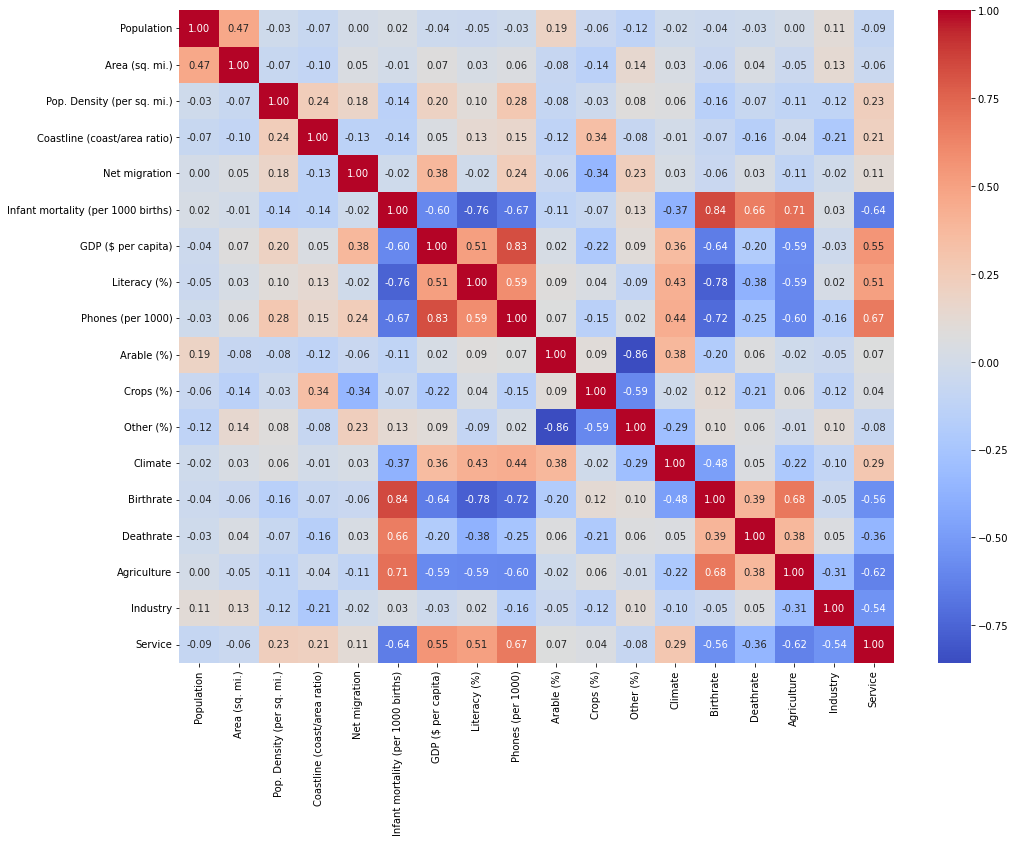

In [25]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_new.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [26]:
y = df_new['GDP ($ per capita)']
x = df_new.drop('GDP ($ per capita)', axis=1)
x = sm.add_constant(x)

model = sm.OLS(y, x)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     38.31
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.03e-54
Time:                        13:52:40   Log-Likelihood:                -2252.4
No. Observations:                 227   AIC:                             4541.
Df Residuals:                     209   BIC:                             4602.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                              -4.075e+05   3.66e+05     -1.114      0.267   -1.13e+06    3.14e+05
Population                         -1.815e-06    3.5e-06     -0.518      0.605   -8.72e-06    5.09e-06
Area (sq. mi.)                      5.316e-05      0.000      0.234      0.815      -0.000       0.001
Pop. Density (per sq. mi.)            -0.3416      0.243     -1.408      0.161      -0.820       0.137
Coastline (coast/area ratio)          -1.1843      5.499     -0.215      0.830     -12.024       9.655
Net migration                        429.1782     79.519      5.397      0.000     272.417     585.939
Infant mortality (per 1000 births)   -50.1527     28.328     -1.770      0.078    -105.999       5.693
Literacy (%)                         -15.3853     30.664     -0.502      0.616     -75.836      45.065
Phones (per 1000)                     29.8575      2.735     10.916      0.000      24.465      35.250
Arable (%)                          4034.4329   3719.631      1.085      0.279   -3298.372    1.14e+04
Crops (%)                           4033.9434   3717.070      1.085      0.279   -3293.813    1.14e+04
Other (%)                           4062.2935   3718.959      1.092      0.276   -3269.185    1.14e+04
Climate                               -8.3097    630.092     -0.013      0.989   -1250.460    1233.841
Birthrate                            -15.3293     76.392     -0.201      0.841    -165.927     135.268
Deathrate                            182.4514    110.574      1.650      0.100     -35.531     400.434
Agriculture                         1591.4086   2.43e+04      0.066      0.948   -4.63e+04    4.95e+04
Industry                            9272.0567    2.4e+04      0.386      0.700    -3.8e+04    5.66e+04
Service                             6307.0250   2.43e+04      0.260      0.795   -4.15e+04    5.41e+04
==============================================================================
Omnibus:                       76.795   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              573.836
Skew:                           1.088   Prob(JB):                    2.47e-125
Kurtosis:                      10.479   Cond. No.                     1.30e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
result.params

const                                -407536.801796
Population                                -0.000002
Area (sq. mi.)                             0.000053
Pop. Density (per sq. mi.)                -0.341632
Coastline (coast/area ratio)              -1.184319
Net migration                            429.178236
Infant mortality (per 1000 births)       -50.152719
Literacy (%)                             -15.385325
Phones (per 1000)                         29.857521
Arable (%)                              4034.432885
Crops (%)                               4033.943372
Other (%)                               4062.293497
Climate                                   -8.309694
Birthrate                                -15.329259
Deathrate                                182.451408
Agriculture                             1591.408639
Industry                                9272.056666
Service                                 6307.024980
dtype: float64

In [30]:
result.model.exog_names #exog = x, endog = y

['Population',
 'Area (sq. mi.)',
 'Pop. Density (per sq. mi.)',
 'Coastline (coast/area ratio)',
 'Net migration',
 'Infant mortality (per 1000 births)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

eval_env: 1


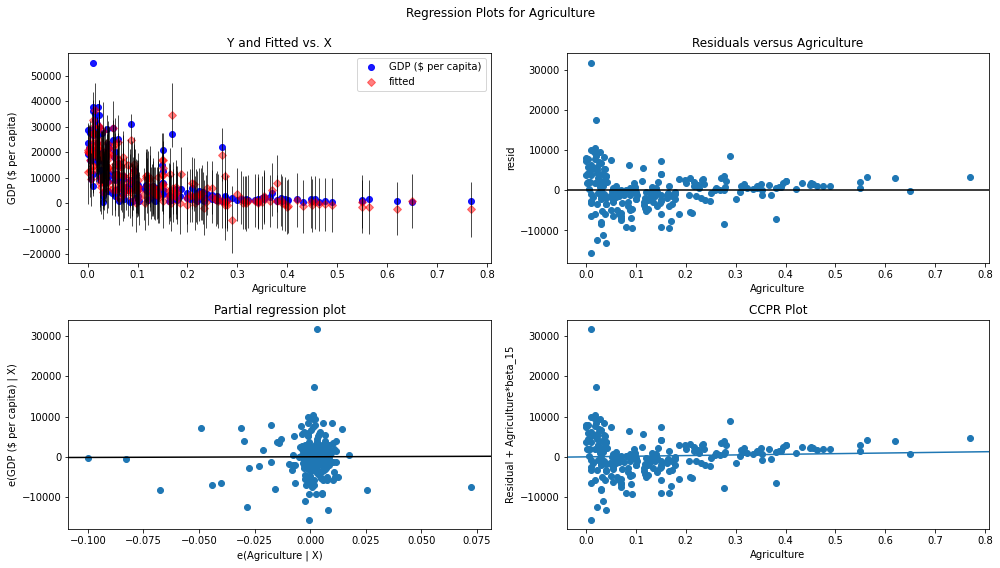

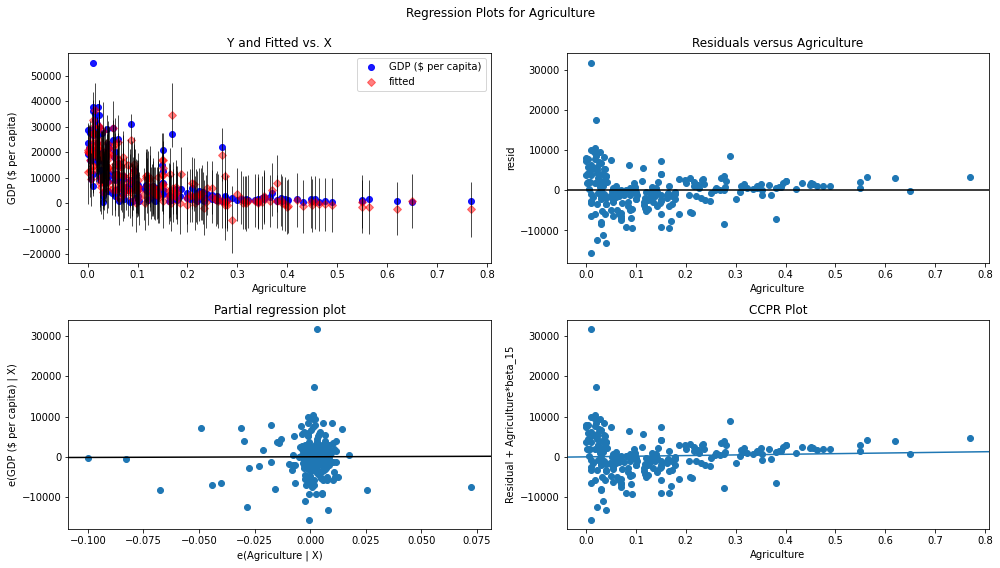

In [32]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
sm.graphics.plot_regress_exog(result, 'Agriculture', fig=fig)

In [34]:
het_goldfeldquandt(result.model.endog, result.model.exog)

(1.2713504892193237, 0.12116139636747283, 'increasing')

VIF является обратной величиной допуска. Чем больше значение, тем очевиднее проблема коллинеарности. Обычно в качестве границы оценки используется 10. Когда VIF <10, мультиколлинеарность отсутствует; когда 10 <= VIF <100, наблюдается 
мультиколлинеарность; когда VIF> = 100, наблюдается сильная мультиколлинеарность.

In [36]:
vif = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns[1:]]

In [38]:
x.columns

Index(['const', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'Literacy (%)',
       'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [37]:
vif

[1150515.2721242432,
 1.4566049025914738,
 1.412752886028182,
 1.3871528405663387,
 1.3510615406488153,
 1.27555660082505,
 8.513374582958292,
 3.00018387130966,
 3.2792586003891735,
 19968.047308687943,
 8205.412408854665,
 30582.025821019874,
 1.7996772555085239,
 6.185326238734848,
 2.5773218904640767,
 104.52192709368165,
 89.44582100383833,
 135.05191796625596]

Допуск - это остаточное отношение, получаемое, когда каждая независимая переменная используется в качестве зависимой переменной для выполнения регрессионного моделирования для других независимых переменных.Величина выражается коэффициентом детерминации, полученным вычитанием 1 из единицы. Чем меньше значение допуска, тем больше вероятность коллинеарности между этой независимой переменной и другими независимыми переменными.

In [ ]:
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]

Обработка данных коллинеарности
    1. Увеличьте размер выборки: увеличение размера выборки может устранить случайную коллинеарность, вызванную недостатком данных.
    2. Разница: для временных рядов разница первого порядка может эффективно устранить мультиколлинеарность.
    3. Ридж-регрессия: отказавшись от объективности метода наименьших квадратов, за счет потери части информации и снижения точности можно получить более практичные и надежные коэффициенты регрессии.
    4. Пошаговая регрессия: каждый раз, когда для статистического тестирования вводится независимая переменная, а затем постепенно вводятся другие переменные, и одновременно проверяются коэффициенты регрессии всех переменных. Если первоначально введенная переменная перестает быть значимой из-за введения последующие переменные, удалите его так долго, и постепенно получите наиболее регрессивное уравнение.
    5. Регрессия главных компонентов (регрессия главных компонентов): с помощью анализа главных компонентов используйте PCA для уменьшения размерности перед моделированием.
    6. Данные с высокой коллинеарностью и низким значением могут быть удалены напрямую.